<a href="https://colab.research.google.com/github/ScotleyW/NesthostFacerecog/blob/main/Nesthost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd
import math
from sklearn import datasets
import matplotlib.pyplot as plt
from dateutil.parser import parse
import matplotlib as mpl
from google.colab import drive
from sklearn.model_selection import train_test_split
import torch.nn as nn
drive.mount('/content/drive/')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/history.csv')
dataset

,Day,leave,going home,rain
0,Monday,08:31,18:21,1
1,Tuesday,08:24,17:32,0
2,Wednesday,08:15,18:30,1
3,Thursday,07:58,17:21,0
4,Friday,08:43,18:21,0
5,Saturday,08:21,13:25,1
6,Sunday,08:22,17:11,0
7,Monday,08:16,16:32,0
8,Tuesday,08:23,17:30,1
9,Wednesday,08:25,18:32,1


In [ ]:
# input
y1 = dataset.iloc[:,  1].values #leaving home
y2= dataset.iloc[:,  2].values #coming home
y3= dataset.iloc[:,  3].values #rain or no rain

# output
X = dataset.iloc[:, 0].values #days

In [ ]:
#converting time and day to value
y1list=[]

for a in y1:
    (h, m) = a.split(':')
    y1list.append(int(h) * 60 + int(m))
y1arr = np.array(y1list)
y1arr=torch.tensor(y1arr)
print(y1arr)

y2list=[]
for b in y2:
    (h, m) = b.split(':')
    y2list.append(int(h) * 60 + int(m))
y2arr = np.array(y2list)
y2arr= torch.from_numpy(y2arr)
print(y2arr)

xdays=[]
for c in X:
  days = { 'Monday': 0,
            'Tuesday': 1,
            'Wednesday': 2,
            'Thursday': 3,
            'Friday': 4,
            'Saturday': 5,
            'Sunday': 6
          }
  xdays.append(days.get(c))
xarr= torch.from_numpy(np.array(xdays))
print(xarr)



tensor([511, 504, 495, 478, 523, 501, 502, 496, 503, 505, 501, 511, 552, 631,
        492, 512, 525, 504, 506, 507, 512, 508, 495, 505, 501, 522, 492, 504,
        502, 497, 512, 501, 505, 501, 505, 505, 501, 503, 510, 501, 490, 540])
tensor([1101, 1052, 1110, 1041, 1101,  805, 1031,  992, 1050, 1112, 1052, 1095,
        1112, 1041, 1069, 1082, 1095, 1115, 1065, 1008, 1091, 1124, 1114, 1100,
        1052, 1134, 1161, 1150, 1121,  992, 1013, 1050, 1139, 1211, 1002, 1090,
        1093, 1097, 1056, 1151, 1030, 1047])
tensor([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
        3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6])


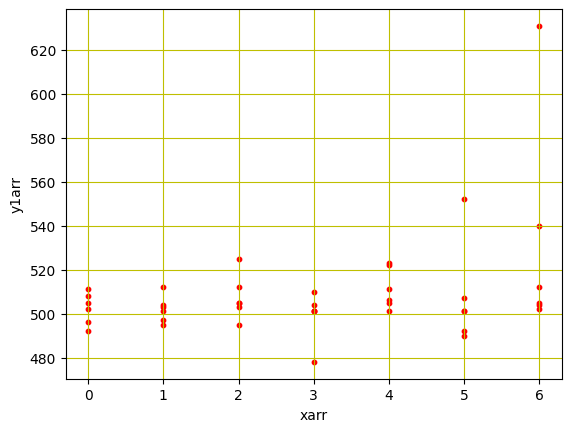

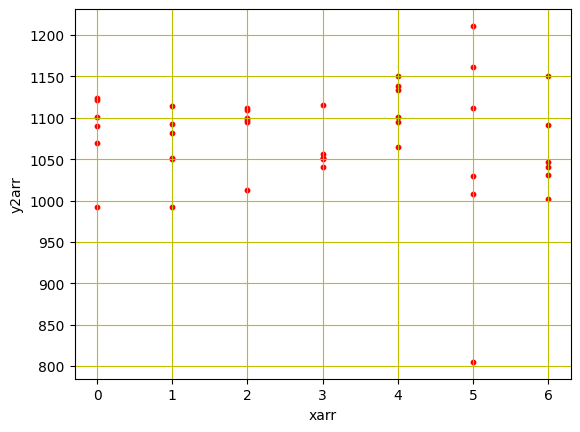

In [ ]:
plt.scatter(xarr, y1arr, color= 'r', s= 10)
plt.xlabel('xarr')
plt.ylabel('y1arr')
plt.grid('True', color='y')
plt.show()

plt.scatter(xarr, y2arr, color='r', s= 10)
plt.xlabel('xarr')
plt.ylabel('y2arr')
plt.grid('True', color='y')
plt.show()

In [ ]:
training_set = zip(xarr, y1arr)
training_set2 = zip(xarr, y2arr)
training_loader = torch.utils.data.DataLoader(list(training_set), batch_size=21, shuffle=True)
validation_loader = torch.utils.data.DataLoader(list(training_set), batch_size=21, shuffle=False)

training_loader2 = torch.utils.data.DataLoader(list(training_set2), batch_size=21, shuffle=True)
validation_loader2 = torch.utils.data.DataLoader(list(training_set2), batch_size=21, shuffle=False)

In [ ]:
input_size = 1
hidden_size = 21
num_classes = 1
num_epochs = 10
batch_size = 52
learning_rate = 0.01

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes) -> None:
     super(NeuralNet, self).__init__()
     self.l1 =  nn.Linear(input_size, hidden_size, device="cpu")
     self.relu = nn.ReLU()
     self.l2 = nn.Linear(hidden_size, hidden_size, device="cpu")
     self.relu2 = nn.ReLU()
     self.l3 = nn.Linear(hidden_size, num_classes, device="cpu")

  def forward(self, xarr):
    out = self.l1(xarr)
    out = self.relu(out)
    out = self.l2(out)
    out = self.relu2(out)
    out = self.l3(out)

    return out

modely1 = NeuralNet(input_size, hidden_size, num_classes).to(device="cpu")
print(modely1)

NeuralNet(
  (l1): Linear(in_features=1, out_features=21, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=21, out_features=21, bias=True)
  (relu2): ReLU()
  (l3): Linear(in_features=21, out_features=1, bias=True)
)


In [ ]:
input_size2 = 2
hidden_size2 = 21
num_classes2 = 2
num_epochs2 = 25
batch_size2 = 52
learning_rate2 = 0.01

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes2) -> None:
     super(NeuralNet, self).__init__()
     self.l1a =  nn.Linear(input_size2, hidden_size2, device="cpu")
     self.relu = nn.ReLU()
     self.l2a = nn.Linear(hidden_size2, hidden_size2, device="cpu")
     self.relu2 = nn.ReLU()
     self.l3a = nn.Linear(hidden_size2, num_classes2, device="cpu")

  def forward(self, xarr):
    out = self.l1a(xarr)
    out = self.relu(out)
    out = self.l2a(out)
    out = self.relu2(out)
    out = self.l3a(out)

    return out

modely2 = NeuralNet(input_size, hidden_size, num_classes2).to(device="cpu")

print(modely2)

NeuralNet(
  (l1a): Linear(in_features=2, out_features=21, bias=True)
  (relu): ReLU()
  (l2a): Linear(in_features=21, out_features=21, bias=True)
  (relu2): ReLU()
  (l3a): Linear(in_features=21, out_features=2, bias=True)
)


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(modely1.parameters(), lr=learning_rate)
optimizer2 = torch.optim.Adam(modely2.parameters(), lr=learning_rate)

In [ ]:
valid_loss_min = np.Inf

for epoch in range(num_epochs):
    train_loss = 0.0
    valid_loss = 0.0


    modely1.train() # prep model for training
    for xarr, y1arr in training_loader:
        y1arr = y1arr.reshape(21, 1)
        optimizer.zero_grad()
        output1 = modely1(y1arr)
        # calculate the loss
        loss = criterion(output1, xarr)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()

    ######################
    # validate the model #
    ######################
    modely1.eval() # prep model for evaluation
    for xarr, y1arr in validation_loader:
        output1 = modely1(y1arr)
        loss = criterion(output1, xarr)
        # update running validation loss
        valid_loss += loss.item()

    train_loss = train_loss/len(training_loader)
    valid_loss = valid_loss/len(validation_loader)


In [ ]:
for epoch in range(num_epochs):
    train_loss = 0.0
    valid_loss = 0.0


    modely1.train() # prep model for training
    for xarr, y2arr in training_loader2:
        y2arr = y2arr.reshape(21, 1)
        optimizer.zero_grad()
        output1 = modely2(y2arr)
        # calculate the loss
        loss = criterion(output2, xarr)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()

    ######################
    # validate the model #
    ######################
    modely2.eval() # prep model for evaluation
    for xarr, y2arr in validation_loader2:
        output2 = modely2(y2arr)
        loss = criterion(output2, xarr)
        # update running validation loss
        valid_loss += loss.item()

    train_loss = train_loss/len(training_loader2)
    valid_loss = valid_loss/len(validation_loader2)


tensor([5, 1, 4, 6, 6, 5, 5, 0, 1, 0, 5, 1, 6, 1, 4, 4, 0, 6, 3, 0, 3])
tensor([[ 805],
        [1082],
        [1095],
        [1150],
        [1002],
        [1008],
        [1211],
        [1121],
        [ 992],
        [1090],
        [1161],
        [1093],
        [1047],
        [1050],
        [1134],
        [1151],
        [ 992],
        [1041],
        [1041],
        [1101],
        [1050]])


RuntimeError: ignored

In [ ]:
#averaging per day
leaveval= []
homeval= []
converter= [[1],[1],[1],[1],[1],[1]]

y1matrix = np.matrix(y1arr.reshape(7, 6))
y2matrix= np.matrix(y2arr.reshape(7, 6))

y1mean=np.array(np.divide(y1matrix*converter, 6))
y2mean=np.array(np.divide(y2matrix*converter, 6))

print(y1mean)
print(y2mean)

newx= []
newx = xarr[0:7]
print(newx)

[[502.        ]
 [503.        ]
 [536.        ]
 [505.5       ]
 [503.        ]
 [504.83333333]
 [507.5       ]]
[[1035.        ]
 [1055.33333333]
 [1085.66666667]
 [1083.66666667]
 [1101.66666667]
 [1084.16666667]
 [1079.        ]]
tensor([0, 1, 2, 3, 4, 5, 6])


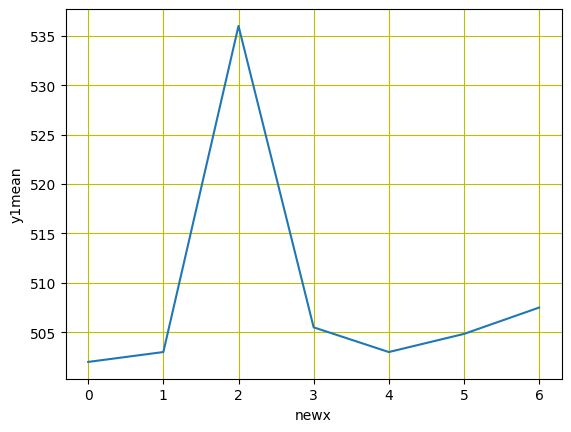

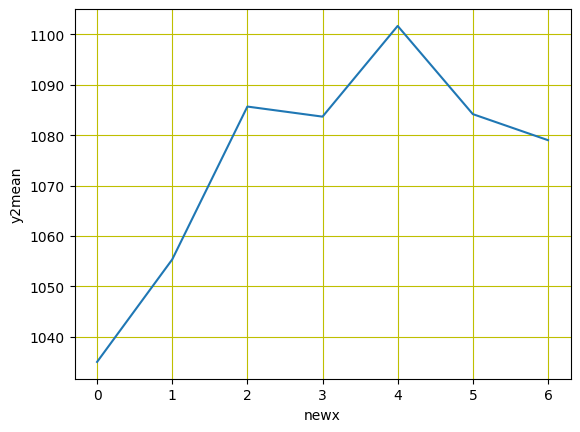

In [ ]:
plt.plot(newx, y1mean)
plt.xlabel('newx')
plt.ylabel('y1mean')
plt.grid('True', color='y')
plt.show()

plt.plot(newx, y2mean)
plt.xlabel('newx')
plt.ylabel('y2mean')
plt.grid('True', color='y')
plt.show()

In [ ]:
#value to time conversion
y1raw=[]
y1hour=[]
y1rawminute=[]
y1minute=[]
y1time=[]

for f1 in y1mean:
   y1raw.append(f1/60)
y1raw = np.array(y1raw)

for f2 in y1raw:
  y1hour.append(int(f2))
y1hour = np.array(y1hour)

y1raw = y1raw.reshape(1,7)
y1minute= np.round((y1raw - y1hour)*60)
y1minute= y1minute[0]

y2raw=[]
y2hour=[]
y2rawminute=[]
y2minute=[]
y2time=[]

for f5 in y2mean:
   y2raw.append(f5/60)
y2raw = np.array(y2raw)

for f6 in y2raw:
  y2hour.append(int(f6))
y2hour = np.array(y2hour)

y2raw = y2raw.reshape(1,7)
y2minute= np.round((y2raw - y2hour)*60)
y2minute= y2minute[0]

for e1, e2 in zip(y1hour, y1minute):
  y1time.append(f"{e1}:{int(e2)}")

print(y1time)

for e5, e6 in zip(y2hour, y2minute):
  y2time.append(f"{e5}:{int(e6)}")
print(y2time)

['8:22', '8:23', '8:56', '8:26', '8:23', '8:25', '8:28']
['17:15', '17:35', '18:6', '18:4', '18:22', '18:4', '17:59']
